# Question 3

## First of all I take the data I need and import the libreries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data')
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df=df.drop(['class identifier'], axis=1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## Here you can find first a visualization part, that takes into consideration only 2 field (in this way we can realize a plot), and than the complete clustering with all the 13 fields

#### For the first part I got inspirated by http://benalexkeen.com/k-means-clustering-in-python/

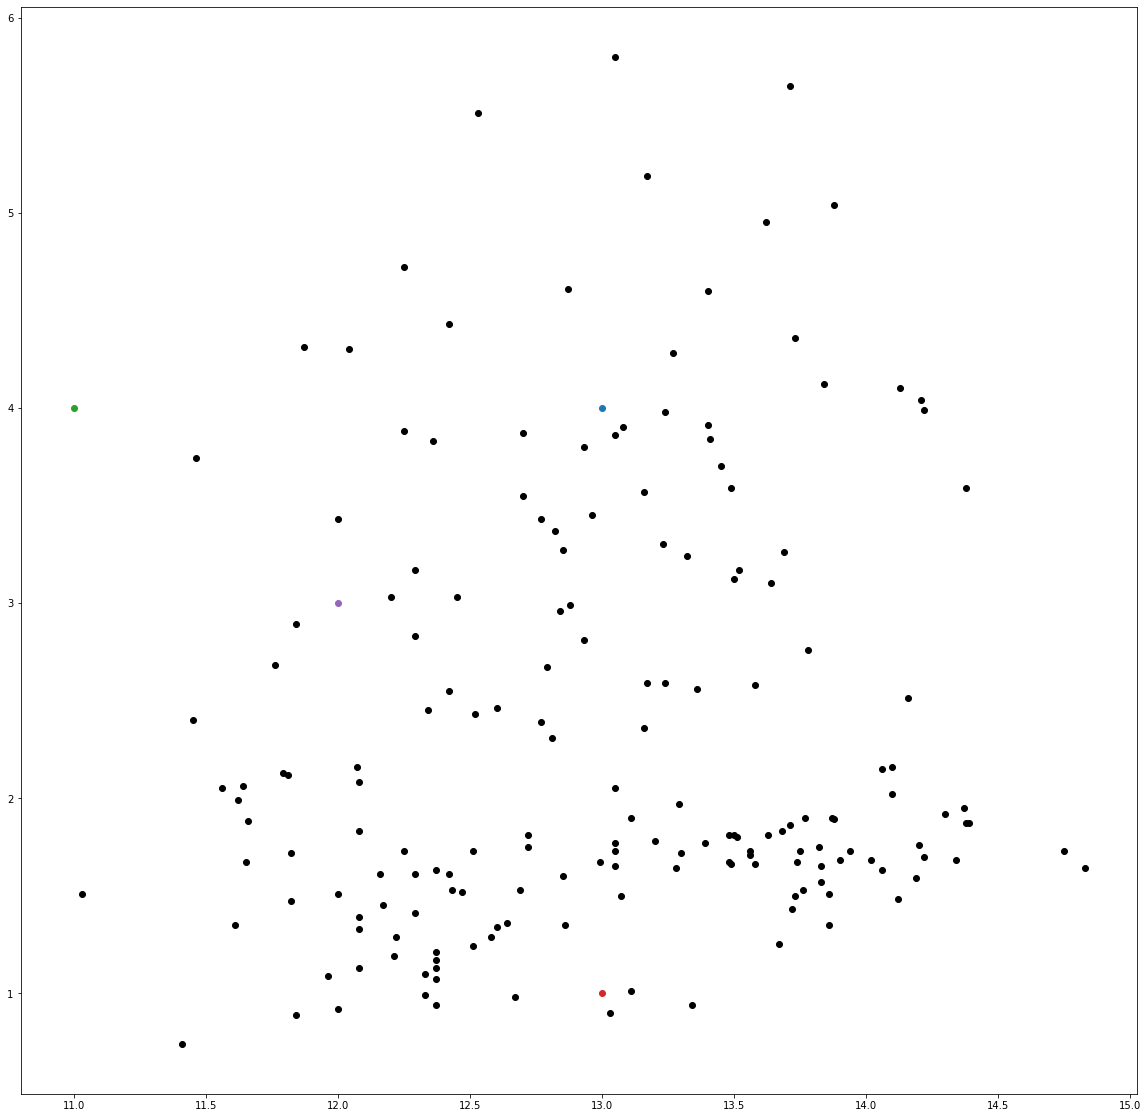

In [147]:
np.random.seed(200)
k = 4
# centroids[i] = [x, y]
# I compute min and max of my fields to be sure to generate cluster in the right range (in the "domain")
minAlcohol=min(df['Alcohol'])
maxAlcohol=max(df['Alcohol'])
minMalicAcid=min(df['Malic acid'])
maxMalicAcid=max(df['Malic acid'])

#print(minAlcohol,' ',maxAlcohol)
#print(minMalicAcid,' ',maxMalicAcid)
centroids = {
    i+1: [np.random.randint(minAlcohol, maxAlcohol), np.random.randint(minMalicAcid, maxMalicAcid)]
    for i in range(k)
}

  
fig = plt.figure(figsize=(20, 20))
plt.scatter(df['Alcohol'], df['Malic acid'], color='k')#df['Ash'], df['Alcalinity of ash'],df['Magnesium'],df['Total phenols'],df['Flavanoids'],df['Nonflavanoid phenols'],
            #df['Proanthocyanins'],df['Color intensity'],df['Hue'],df['OD280/OD315 of diluted wines'],df['Proline'], color='k')
#colmap = {1: 'r', 2: 'g', 3: 'b'}
colmap = {1: 'tab:red', 2: 'tab:green', 3: 'tab:blue', 4:'tab:purple', 5:'tab:cyan', 6:'tab:olive', 7:'tab:orange', 8:'tab:pink', 9:'tab:brown', 10:'tab:gray'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

### I define a function for the distance, using numpy



In [148]:
def distance(x,y):
    return np.sqrt(((x-y)**2).sum())
    
# def distanceFromi(df, centroids):
#     df['distance_from_{}'.format(i)] = (
#             np.sqrt(
#                 (df['Alcohol'] - centroids[i][0]) ** 2
#                 + (df['Malic acid'] - centroids[i][1]) ** 2
#             )
#         )
    
    
#     S=0
#     for i in centroids.keys():
#         S=0
#         np.sqrt(
#                 (df['Alcohol'] - centroids[i][0]) ** 2
#                 + (df['Malic acid'] - centroids[i][1]) ** 2
#             )
        

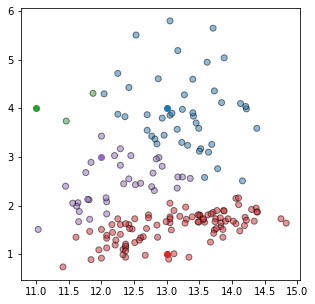

In [149]:
## Assignment Stage
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Alcohol'] - centroids[i][0]) ** 2
                + (df['Malic acid'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df= assignment(df, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Alcohol'], df['Malic acid'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()
#df1[['Alcohol','Malic acid','distance_from_1','distance_from_2','distance_from_3','distance_from_4']]

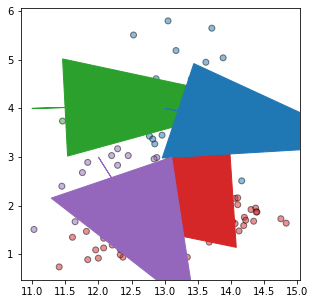

In [150]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['Alcohol'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Malic acid'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['Alcohol'], df['Malic acid'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

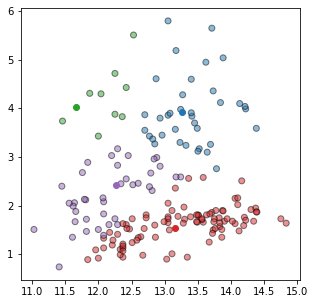

In [151]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Alcohol'], df['Malic acid'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

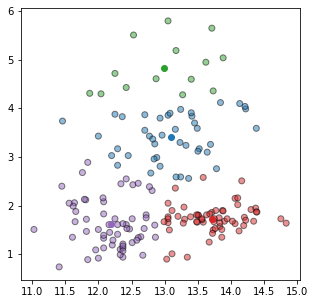

In [153]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Alcohol'], df['Malic acid'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

## Now we're ready to deal with the clustering for the whole dataframe!

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data')
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df=df.drop(['class identifier'], axis=1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [168]:
#vedi https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns
np.random.seed(200)
k = 4

# Now we want to be more precise: we'll calculate max and min for value in every field to be sure to use every one 
# of our random centroids
cols=list(df.columns)
#print(cols)
maxvec=[]
minvec=[]
for i in cols:
    ma=df[i].max()
    maxvec.append(ma)
    mi=df[i].min()
    minvec.append(mi)

centroids = {
    i+1: [round(np.random.uniform(minvec[j], maxvec[j]),4) for j in range(13)]
    for i in range(k)
}
centroids


{1: [14.631,
  1.8863,
  2.4716,
  18.9092,
  140.3009,
  0.9883,
  2.0342,
  0.6121,
  1.8558,
  12.7867,
  1.5468,
  3.9619,
  1572.4199],
 2: [12.184,
  5.0213,
  1.5867,
  25.8402,
  93.0465,
  1.2585,
  4.8121,
  0.5678,
  2.0531,
  11.5174,
  1.1914,
  2.4987,
  1231.5801],
 3: [12.6238,
  3.9804,
  2.4982,
  12.6454,
  158.8761,
  3.1802,
  3.5615,
  0.3046,
  0.4939,
  10.6989,
  1.6766,
  2.0424,
  1188.0027],
 4: [12.0392,
  1.6897,
  2.1436,
  23.5204,
  117.6019,
  3.458,
  1.1506,
  0.6484,
  1.365,
  4.0043,
  1.4537,
  3.6832,
  1662.1925]}

In [169]:
## Assignment Stage

def assignmentAll(df, centroids):
    for i in centroids.keys():
        #for j in range(12):
            #print(centroids[i][j], end=' ')
            #centroids[i][j] = np.mean(centrDf[centrDf['closest'] == i][centrDf.columns[j]])
            #print(centroids[i][j])
            #cent
            # sqrt((x1 - x2)^2 - (y1 - y2)^2)
            #print(centroids[i][j])#, centroids[i][j+1])
            #df['distance_from_{}'.format(i)] = distance(df[df.columns[j]], centroids[i][j])

        df['distance_from_{}'.format(i)] = (
                np.sqrt(
                    (df['Alcohol'] - centroids[i][0]) ** 2
                    + (df['Malic acid'] - centroids[i][1]) ** 2
                    + (df['Ash'] - centroids[i][2]) ** 2
                    + (df['Alcalinity of ash'] - centroids[i][3]) ** 2
                    + (df['Magnesium'] - centroids[i][4]) ** 2
                    + (df['Total phenols'] - centroids[i][5]) ** 2
                    + (df['Flavanoids'] - centroids[i][6]) ** 2
                    + (df['Nonflavanoid phenols'] - centroids[i][7]) ** 2
                    + (df['Proanthocyanins'] - centroids[i][8]) ** 2
                    + (df['Color intensity'] - centroids[i][9]) ** 2
                    + (df['Hue'] - centroids[i][10]) ** 2
                    + (df['OD280/OD315 of diluted wines'] - centroids[i][11]) ** 2
                    + (df['Proline'] - centroids[i][12]) ** 2
                )
            )
    
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    
    return df

centrDf = assignmentAll(df, centroids)
centrDf.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,distance_from_1,distance_from_2,distance_from_3,distance_from_4,closest
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,524.102370,182.495146,150.207321,612.573602,3
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,389.484796,48.318084,58.562363,477.519379,2
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,96.578734,249.460981,295.644761,182.448205,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,837.766763,497.298251,454.971544,927.199621,3
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,125.883238,219.599968,266.219370,212.473393,1


In [172]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def updateAll(k):
    for i in centroids.keys():
        for j in range(13):
            centroids[i][j] = np.mean(centrDf[centrDf['closest'] == i][centrDf.columns[j]])
          
    return k

centroids = updateAll(centroids)
centroids

{1: [14.126000000000001,
  1.8800000000000001,
  2.3979999999999997,
  16.22,
  107.6,
  3.246,
  3.406,
  0.262,
  2.288,
  6.94,
  1.09,
  3.0700000000000003,
  1500.4],
 2: [13.76235294117647,
  1.7805882352941176,
  2.5405882352941176,
  17.358823529411765,
  105.41176470588235,
  2.8329411764705883,
  2.9758823529411766,
  0.308235294117647,
  1.8235294117647058,
  5.916470588235293,
  1.095294117647059,
  3.038235294117647,
  1270.8823529411766],
 3: [12.864285714285712,
  2.4214285714285717,
  2.34512987012987,
  19.881818181818176,
  98.62987012987013,
  2.1950649350649347,
  1.8610389610389608,
  0.37181818181818194,
  1.5362987012987017,
  4.874805188311687,
  0.9356233766233764,
  2.5398701298701294,
  656.461038961039],
 4: [14.19,
  1.59,
  2.48,
  16.5,
  108.0,
  3.3,
  3.93,
  0.32,
  1.86,
  8.7,
  1.23,
  2.82,
  1680.0]}

In [173]:
## Repeat Assigment Stage

df = assignmentAll(df, centroids)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,distance_from_1,distance_from_2,distance_from_3,distance_from_4,closest
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,450.502505,221.042033,393.640473,630.090775,2
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,315.483317,86.015229,528.550698,495.066674,2
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,21.143608,209.269411,823.680853,200.067991,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,765.491681,536.045994,80.912734,945.075834,3
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,50.604122,179.255444,793.671407,230.047518,1


In [176]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = updateAll(centroids)
    df = assignmentAll(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
finalDf=df[['Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline','closest']]
finalDf.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,closest
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,4
